In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Let's take a look at the data...

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/jvanlier/TIAS_ML_DL/master/Day1Notebooks/data/winequality-red.csv")

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
1,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
4,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3


Ok, we want to classify the quality, but it's a numeric value.
Let's take a look at the distribution.

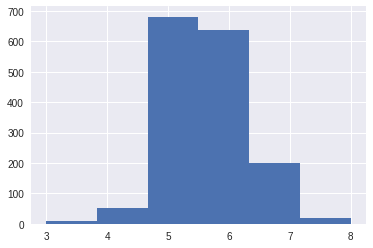

In [0]:
df["quality"].hist(bins=df["quality"].nunique())

Ok, let's call wines with quality 6, 7 or 8 "good". The rest is "not good".

In [0]:
df["isGood"] = 0
df.loc[df["quality"] >= 6, "isGood"] = 1

In [0]:
df["isGood"].value_counts()

1    855
0    744
Name: isGood, dtype: int64

Good, the distribution of 0s and 1s is pretty balanced. This should make it easier to classify and evaluate.

In [0]:
df = df.drop("quality", axis=1)

Ok, we've now binarized the target variable.

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,isGood
0,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,0
1,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,0
2,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,0
3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,0
4,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,0


In [0]:
# Save it for later
df.to_csv("/tmp/wine-binary.csv", index=False)

### A first model

Let's go with Logistic Regression.

Take a look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and try to import it.


In [0]:
#from sklearn # ... YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression()

In [0]:
X = df.drop("isGood", axis=1)  # Make sure that the target is not also part of the features!
y = df["isGood"]

Try to train the classifier below (on the full data set, so no train/test split yet):

Hint: take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit).

In [0]:
#model. # ... YOUR CODE HERE
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now, try to get a score below.

Again, you might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score).

In [0]:
#model.  # ... YOUR CODE HERE
model.score(X, y)

0.7435897435897436

What do you think about this score? Good? Bad?

Before you move on, try and see what happens if we're *not* dropping "isGood" from the dataset before fitting. What is the effect on the score?

Restore the drop before moving on.

To evaluate whether the score is good, it's always wise to compare it to a simple baseline.

Let's take a look the number of 0's and the number of 1's again:

In [0]:
df["isGood"].value_counts()

1    855
0    744
Name: isGood, dtype: int64

What would the accuracy be if we always predict the majority class: 1?

In [0]:
# YOUR CODE HERE
855 / (855 + 744)

0.5347091932457786

So, how do you feel about the model's accuracy?

## Let's see some examples

In [0]:
random_example = X.sample(n=1)
print("True 'isGood' value: {}".format(df.loc[random_example.index, "isGood"].values[0]))
random_example

True 'isGood' value: 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
518,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.998,3.33,0.54,9.8


Now [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) whether it's any good!

In [0]:
#model. # YOUR CODE HERE
model.predict(random_example)

array([0])

You might wonder why it's only showing 0 and 1. Logistic Regression can do probabilities, right?

Well, there is another function that returns probabilities. See if you can find it in the documentation.

In [0]:
#model. # YOUR CODE HERE
model.predict_proba(random_example)

array([[0.55133375, 0.44866625]])

Try to run this again for some other random samples.

### Inspecting the model

We can take a look at the coefficients of the model. Try to assign them here:

In [0]:
#coef = # YOUR CODE HERE
coef = model.coef_

In [0]:
coef_map = dict(zip(df.columns.values, coef[0]))
coef_map

{'alcohol': 0.8826661223283571,
 'chlorides': -1.6339045553799014,
 'citric acid': -0.7663740337661563,
 'density': -1.3981515920047465,
 'fixed acidity': -0.004505443323345879,
 'free sulfur dioxide': 0.0254227033315018,
 'pH': -1.5576265840835957,
 'residual sugar': 0.02434650808046358,
 'sulphates': 1.9476807113971244,
 'total sulfur dioxide': -0.018098055434784942,
 'volatile acidity': -2.8951420691131156}

Some of these stand out. Let's inspect some of them:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


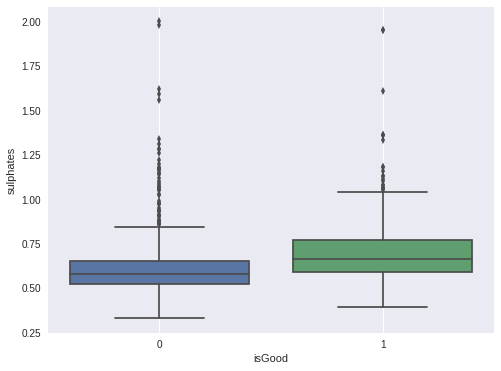

In [0]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="isGood", y="sulphates", data=df)
plt.grid()

Any interesting findings?

### Our methodology was a bit flawed here...

If we use the full dataset for training, and then report the score on the same data set as we used for training, the score is usually a bit *too* positive. 

Below is an import for a new function that will help us make a training and testing split. Could you see if you can get it to work? [Docs are here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
X_train.shape

(1199, 11)

In [0]:
X_test.shape

(400, 11)

You should now have 4 new variables: X_train, X_test, y_train, y_test

### Open-ended asignment

- Re-train the model, but now only on X_train and y_train. 
- Evaluate on both X_train & y_train and X_test & y_test. Do you notice a difference?
- Increase the complexity: add polynomial features (manually or using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)). What does this do to the scores on train & test?
- You might be able to get the train and test scores closer together by tuning the "C" parameter. Give that a go.
- What is your best score?

In [0]:
# YOUR CODE HERE
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Training set score {:0.3f}".format(lr.score(X_train, y_train)))
print("Test     set score {:0.3f}".format(lr.score(X_test, y_test)))


Training set score 0.750
Test     set score 0.730


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(1599, 11)
(1599, 364)


In [0]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y)

In [0]:
lr = LogisticRegression(C=2)
lr.fit(X_poly_train, y_poly_train)
print("Training set score {:0.3f}".format(lr.score(X_poly_train, y_poly_train)))
print("Test     set score {:0.3f}".format(lr.score(X_poly_test, y_poly_test)))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score 0.770
Test     set score 0.745


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
